# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [5]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [6]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

In [7]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {'n_clusters': 3}), (no_structure, {'n_clusters': 6})]

<Figure size 720x576 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

Ward has labels before predict 1
Average has labels before predict 2
Single has labels before predict 3
Complete has labels before predict 4
Ward has labels before predict 5
Average has labels before predict 6
Single has labels before predict 7
Complete has labels before predict 8
Ward has labels before predict 9
Average has labels before predict 10
Single has labels before predict 11
Complete has labels before predict 12


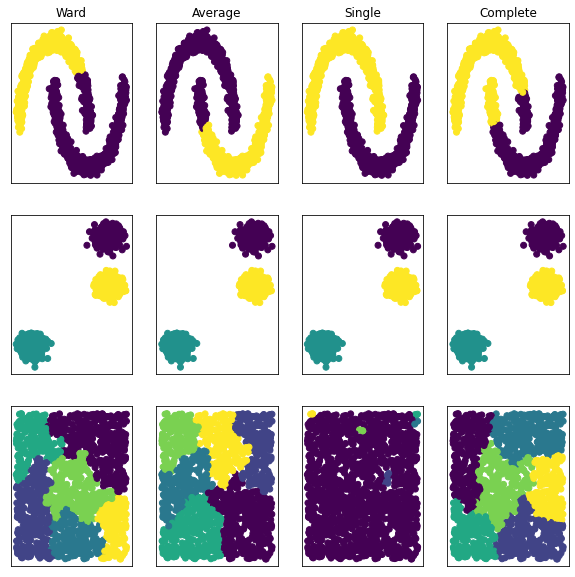

In [8]:
# 執行各種樣板資料的繪圖迴圈
plotindex = 1
plt.figure(figsize = (10,10))
for dataset,params in datasets:
    Ward = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'],linkage = 'ward')
    Average = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'],linkage = 'average')
    Single = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'],linkage = 'single')
    Complete = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'],linkage = 'complete')
    
    Models = [('Ward',Ward),('Average',Average),('Single',Single),('Complete',Complete)]
    
    X,y = dataset
    X = StandardScaler().fit_transform(X)
    for name,algo in Models:
        plt.subplot(len(datasets),len(Models),plotindex)
        if plotindex < 5:
            plt.title(name)
        
        algo.fit(X)
        if hasattr(algo,'labels_'):
            print(f"{name} has labels before predict {plotindex}")
            predicted_y = algo.labels_.astype(np.int)
        else:
            print(f"{name} has no labels at round {plotindex}")
            predicted_y = algo.predict(dataset)
            
        plt.scatter(X[:,0],X[:,1],c = predicted_y)
        plt.xticks([])
        plt.yticks([])
        plotindex += 1
        
    